In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import csv

## Exercício 1

Dada a distribuição normal 2D centralizada em 3 mostrada abaixo. Remova a média do das colunas (x, y) para centralizar a distribuição em zero.


**O seu código não deve conter nenhum tipo de loop (for/while)**

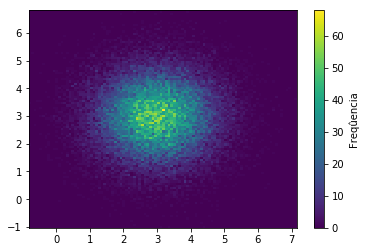

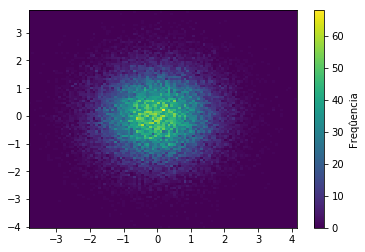

In [2]:
a = np.random.normal(loc=3, size=(50000, 2))
plt.hist2d(a[:, 0], a[:, 1], bins=100)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Freqûencia')
plt.show()
########################
# Inicio do seu codigo #
########################

a = a - np.mean(a, axis=0, keepdims=True)
plt.hist2d(a[:, 0], a[:, 1], bins=100)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Freqûencia')
plt.show()


########################
#   Fim do seu codigo  #
########################

## Exercício 2

Calcule a média de cada um dos canais da imagem abaixo (RGB), após calcular a média, para cada pixel da imagem, remova a média do seu respectivo canal.

**O seu código não deve conter nenhum tipo de loop (for/while)**

Shape da imagem: (500, 900, 3), dtype: uint8


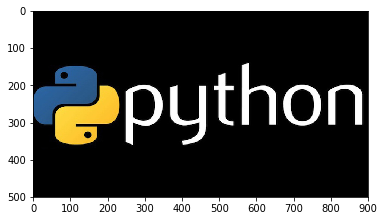

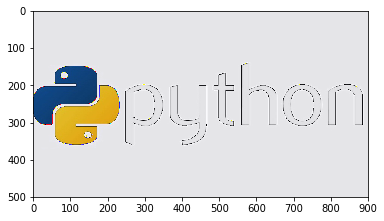

In [3]:
image = np.array(Image.open('python_image.jpg'))
print('Shape da imagem: {}, dtype: {}'.format(image.shape, image.dtype))
plt.imshow(image)
plt.show()
########################
# Inicio do seu codigo #
########################

image = image - np.mean(image, axis=(0, 1), keepdims=True)
image = image.astype(np.uint8) # forçando a conversão para uint8 (a maneira mais adequada seria reeascalar os valores)
plt.imshow(image)
plt.show()



########################
#   Fim do seu codigo  #
########################

## Exercício 3

Faça a normalização dos dados a seguir utilizando a abordagem Z-score. A abordagem Z-score consiste em centralizar os dados em 0 (remover a média) e corrigir deformidades. A fórmula da normalização é a seguir:

$$x_{i} = \frac{x_{i} - \mu_{i}}{\sigma_{i}}$$

Onde $x_{i}$ é um atributo do dataset.

**O seu código não deve conter nenhum tipo de loop (for/while)**

(178, 4)


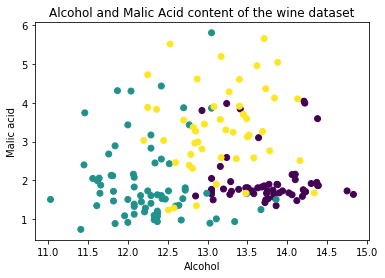

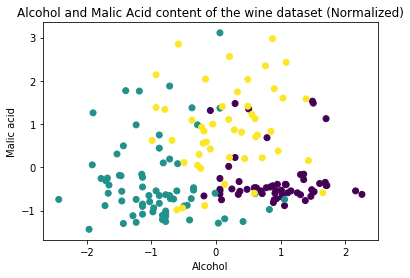

In [4]:
dataset = np.loadtxt('wine_data.csv', delimiter=',')
dataset = dataset[:, :4] # ['Class label', 'Alcohol', 'Malic acid']
print(dataset.shape)
plt.scatter(dataset[:, 1], dataset[:, 2], c=dataset[:, 0])
plt.title('Alcohol and Malic Acid content of the wine dataset')
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')
plt.show()
########################
# Inicio do seu codigo #
########################

# separando a coluna que contém os rótulos das instâncias
class_labels = dataset[:, 0]
# separando os atributos que queremos normalizar
atributos_ds = dataset[:, [1, 2]]
atributos_ds = atributos_ds - np.mean(atributos_ds, axis=0, keepdims=True)
atributos_ds = atributos_ds / np.std(atributos_ds, axis=0, keepdims=True)

# plotando os dados normalizados
plt.scatter(atributos_ds[:, 0], atributos_ds[:, 1], c=class_labels)
plt.title('Alcohol and Malic Acid content of the wine dataset (Normalized)')
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')
plt.show()


########################
#   Fim do seu codigo  #
########################

## Exercício 4

Dada a função abaixo que recebe 3 vértices 2D (3x2) e plota o triângulo correspondente, calcule o centro do triângulo e utilize a função `plot_triangle` para plotar o triângulo juntamente com o seu centro.

**O seu código não deve conter nenhum tipo de loop (for/while)**

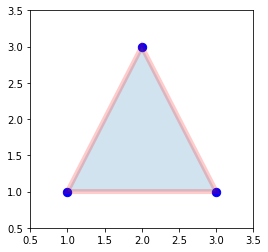

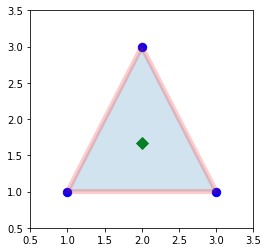

In [5]:
def plot_triangle(vertices, center=None):
    trishape = plt.Polygon(vertices, edgecolor='r', alpha=0.2, lw=5)
    _, ax = plt.subplots(figsize=(4, 4))
    ax.add_patch(trishape)
    ax.set_ylim([.5, 3.5])
    ax.set_xlim([.5, 3.5])
    if center is not None:
        ax.scatter(*center, color='g', marker='D', s=70)
    ax.scatter(vertices[:, 0], vertices[:, 1], color='b',  s=70)
    plt.show()
    
coordenadas = np.array([[1, 1],
                        [3, 1],
                        [2, 3]])
plot_triangle(coordenadas)
########################
# Inicio do seu codigo #
########################

# o centro do triângulo neste caso é a penas a média das coordenadas x e y
plot_triangle(coordenadas, np.mean(coordenadas, axis=0))

########################
#   Fim do seu codigo  #
########################

## Exercício 5

Dado o array 2D abaixo, normalize **cada linha** pela sua **própria norma L2**. A fórmula da normalização L2 é a seguinte:

$\frac{x_{i}}{\sqrt{x_{1}^2 + x_{2}^2 + ... x_{n}^2}}$ para cada item $i \in \{0, 1, ..., n\}$ do array.

Você deve realizar **todos os cálculos**. Para este exercício você não deve usar a função `np.linalg.norm(...)`.

**O seu código não deve conter nenhum tipo de loop (for/while)**

In [6]:
a = np.random.normal(size=(20, 100))
########################
# Inicio do seu codigo #
########################

# passo 1: elevar todos ao quadrado
norm = a**2
# passo 2: fazer a soma dos elementos de cada linha
norm = np.sum(norm, axis=1, keepdims=True)
# passo 3: extrair a raiz quadrada
norm = np.sqrt(norm)
# passo 4: normalizar cada linha da matriz a
print('Shape de a: {}, shape da norma: {}'.format(a.shape, norm.shape))
a = a / norm

# testando: se a foi normalizado corretamente, a norma de cada linha deve ser 1 se calcularmos novamente:
print(np.linalg.norm(a, axis=1))

########################
#   Fim do seu codigo  #
########################

Shape de a: (20, 100), shape da norma: (20, 1)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
